<p align=center>🤖Zoidberg KNN📈</p>

---

# Import the necessary libraries

sklearn for machine learning related tasks, more specialized in basic machine learning algorithms and useful functions than deep neural networks like tensorflow or pytorch

numpy for general array conversions

cv2 for loading/preprocessing of images

os for path operations (to get the dataset)

matplotlib's pyplot for graphs

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils import resample, shuffle
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Get access to the dataset

If possible (cloud runtime), get it from the shared google drive folder. Otherwise (local runtime) get it from the user's downloads folder.

In [40]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_dir = "/content/drive/MyDrive/ZoidBerg2.0 - T-Dev-810/chest_Xray"
except:
    base_dir = os.path.join(os.environ['USERPROFILE'], 'Downloads', 'chest_Xray')

# Load images and labels

In [41]:
def load_images_and_labels(base_dir, sub_dirs, min_pixels=797094): # min pixels + 10% of the max-min pixels range, images that are too small (too few pixels) is bad data to upsize
    # average width and heights of all images, ideally we'd resize to the middle to try to get the "best size" but it turns out the standard 224x224 size works aswell and eats less ram
    # width = 1328
    # height = 971
    # size = (width + height) // 2

    size = 224
    offset = round(size * 0.1)
    pneumonia_images = []
    normal_images = []

    for sub_dir, label in sub_dirs.items():
        path = os.path.join(base_dir, sub_dir)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None and img.size >= min_pixels:

                # the following preprocessing operations tried did not yield noticable improvements
                # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                # img = clahe.apply(img)
                # img = cv2.GaussianBlur(img, (5, 5), 0)
                # img = cv2.medianBlur(img, 5)
                # img = cv2.equalizeHist(img)
                # img = img[offset:size - offset, offset:size - offset]
                # img = cv2.applyColorMap(img, cv2.COLORMAP_HSV)

                img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
                img = cv2.resize(img, (size, size))
                if label == 1:
                    pneumonia_images.append(img.flatten())
                else:
                    normal_images.append(img.flatten())

    # resample the loaded images so that there's as much pneumonia images as normal images
    if len(pneumonia_images) > len(normal_images):
        normal_images = resample(normal_images, n_samples=len(pneumonia_images))
    elif len(normal_images) > len(pneumonia_images):
        pneumonia_images = resample(pneumonia_images, n_samples=len(normal_images))

    images = pneumonia_images + normal_images
    labels = [1] * len(pneumonia_images) + [0] * len(normal_images)
    # shuffle images (along with their label) so that we don't have all pneumonia_images then all normal_images which could unfairly help the model in finding the right results (set random_state for reproducible results)
    images, labels = shuffle(images, labels)

    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(base_dir, {os.path.join('train', 'PNEUMONIA'): 1, os.path.join('train', 'NORMAL'): 0})
X_test, Y_test = load_images_and_labels(base_dir, {os.path.join('test', 'PNEUMONIA'): 1, os.path.join('test', 'NORMAL'): 0})

# Standardize the data

Standardize features by removing the mean and scaling to unit variance

In [42]:
# even though the practice is common for KNN, I fail to understand why it's needed as we already normalize/resize during loading and it doesn't change the results
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Run the KNN multiple times to find the best k

while displaying accuracies (how accurate in its judgement the KNN is overall), classification reports (precision, recall and other additional metrics to accuracy), confusion matrices (amount of true/false positives/negatives) and ROC curves (trade-off between the true positive rate and the false positive rate).

Running KNN with k=1...
Accuracy: 66.09%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.38      0.53       233
           1       0.60      0.94      0.73       233

    accuracy                           0.66       466
   macro avg       0.73      0.66      0.63       466
weighted avg       0.73      0.66      0.63       466



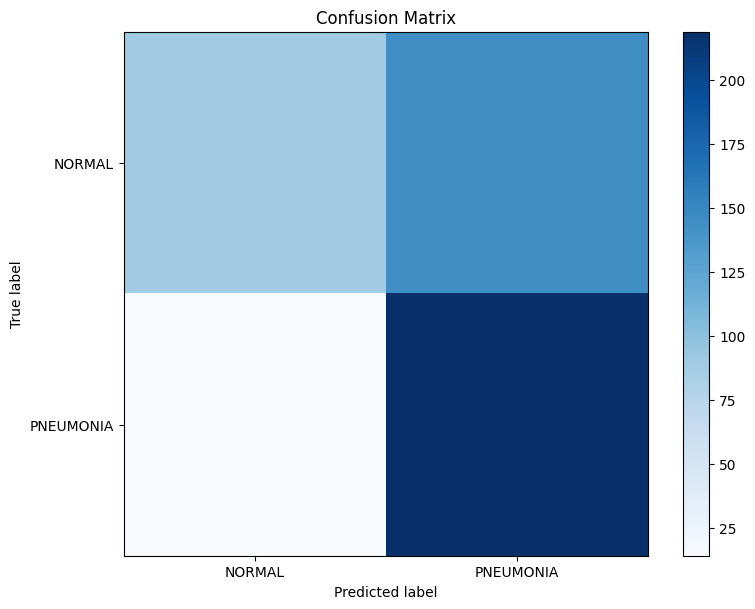

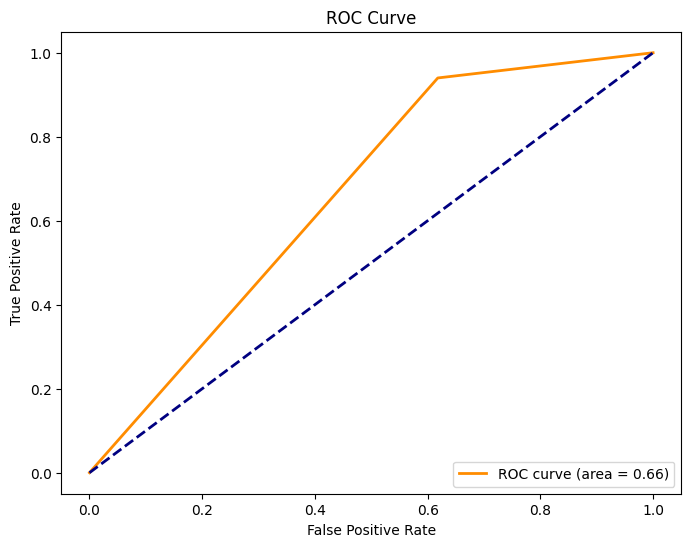

Running KNN with k=2...
Accuracy: 72.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       233
           1       0.66      0.92      0.77       233

    accuracy                           0.72       466
   macro avg       0.76      0.72      0.71       466
weighted avg       0.76      0.72      0.71       466



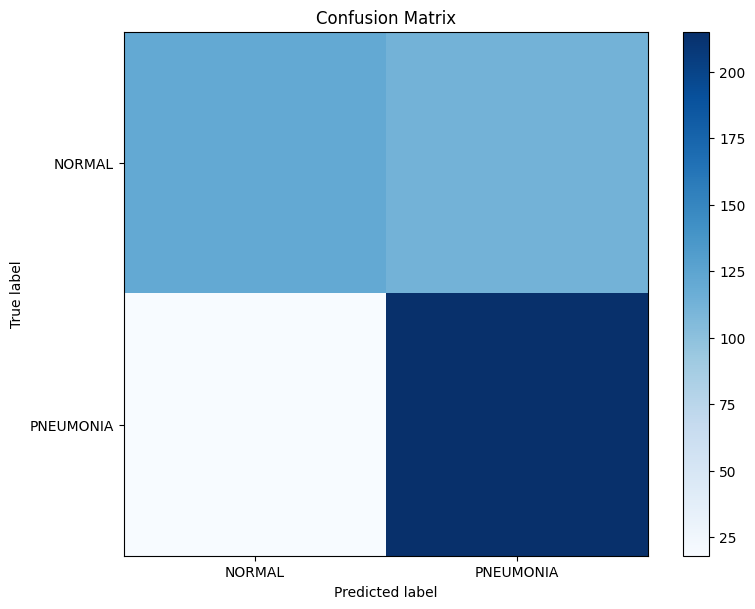

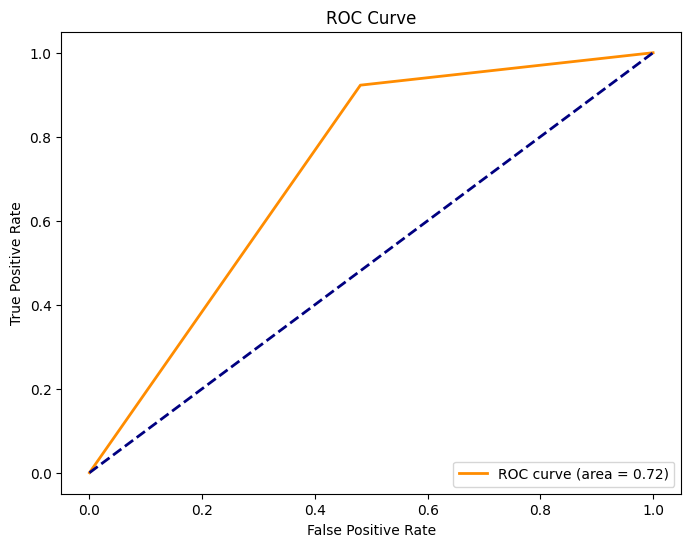

Running KNN with k=3...
Accuracy: 70.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62       233
           1       0.64      0.94      0.76       233

    accuracy                           0.71       466
   macro avg       0.77      0.71      0.69       466
weighted avg       0.77      0.71      0.69       466



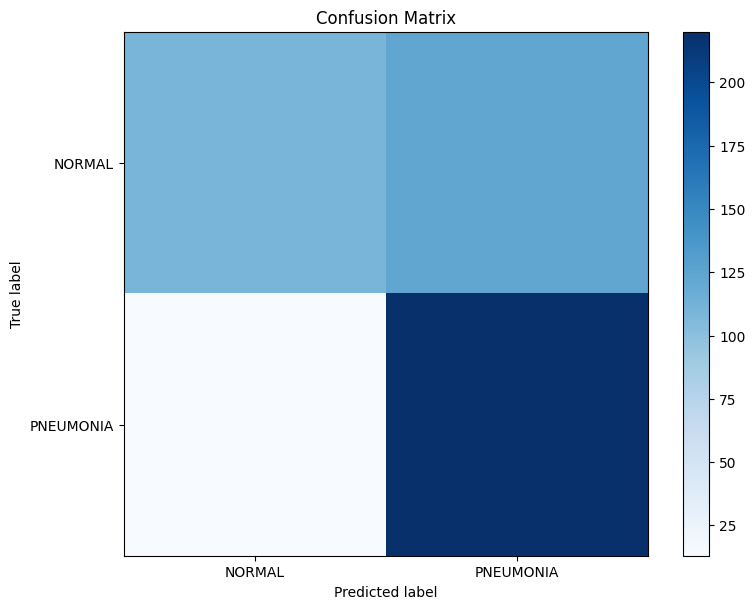

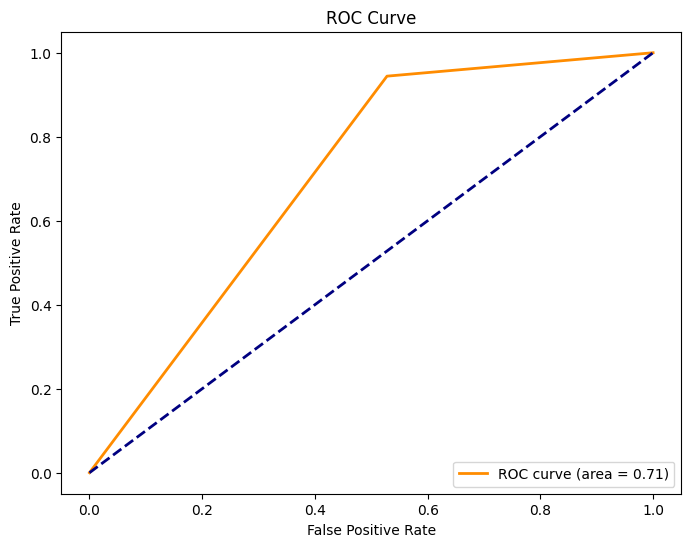

Running KNN with k=4...
Accuracy: 72.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       233
           1       0.67      0.89      0.77       233

    accuracy                           0.73       466
   macro avg       0.76      0.73      0.72       466
weighted avg       0.76      0.73      0.72       466



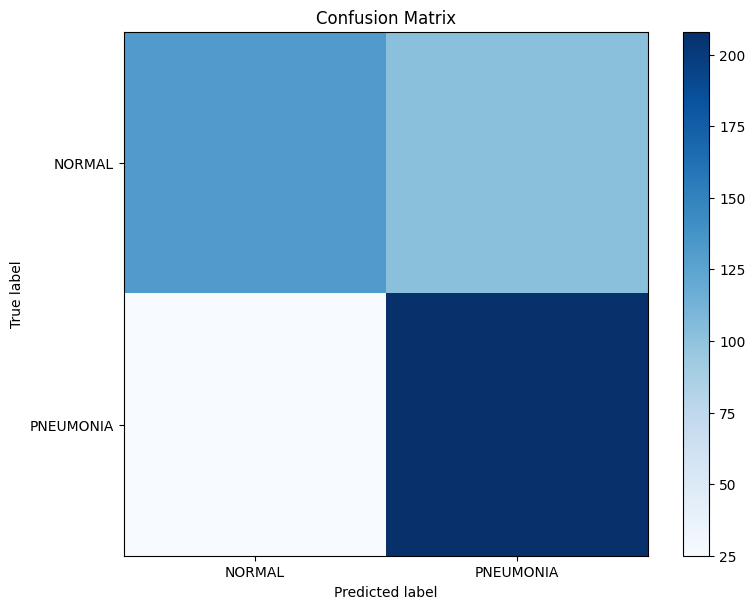

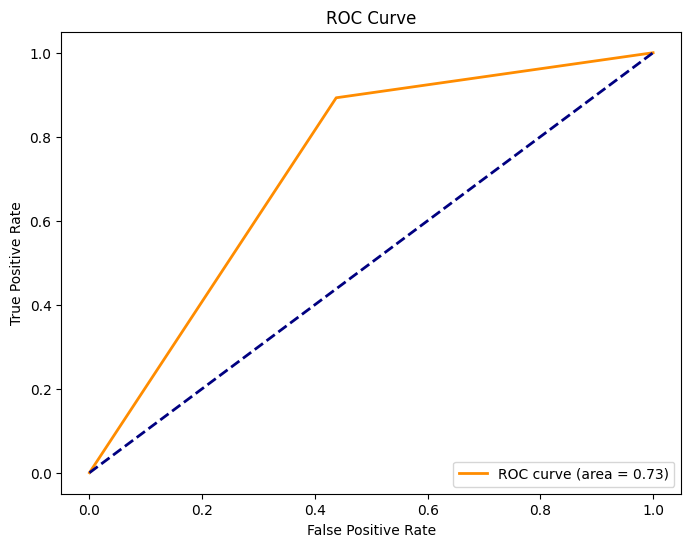

Running KNN with k=5...
Accuracy: 70.17%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.48      0.62       233
           1       0.64      0.92      0.76       233

    accuracy                           0.70       466
   macro avg       0.75      0.70      0.69       466
weighted avg       0.75      0.70      0.69       466



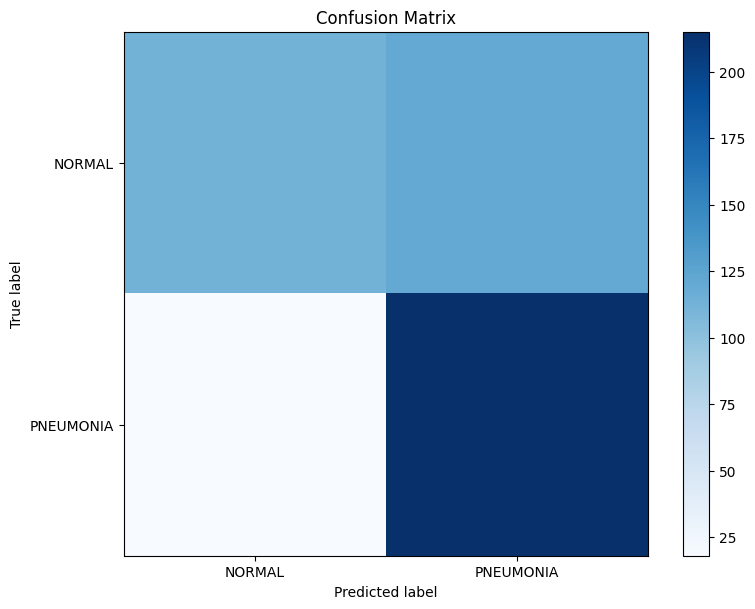

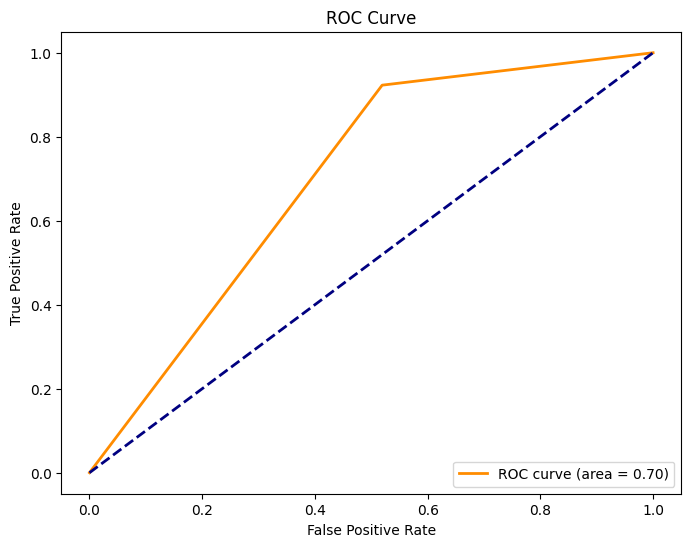

Running KNN with k=6...
Accuracy: 71.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       233
           1       0.66      0.91      0.76       233

    accuracy                           0.72       466
   macro avg       0.75      0.72      0.71       466
weighted avg       0.75      0.72      0.71       466



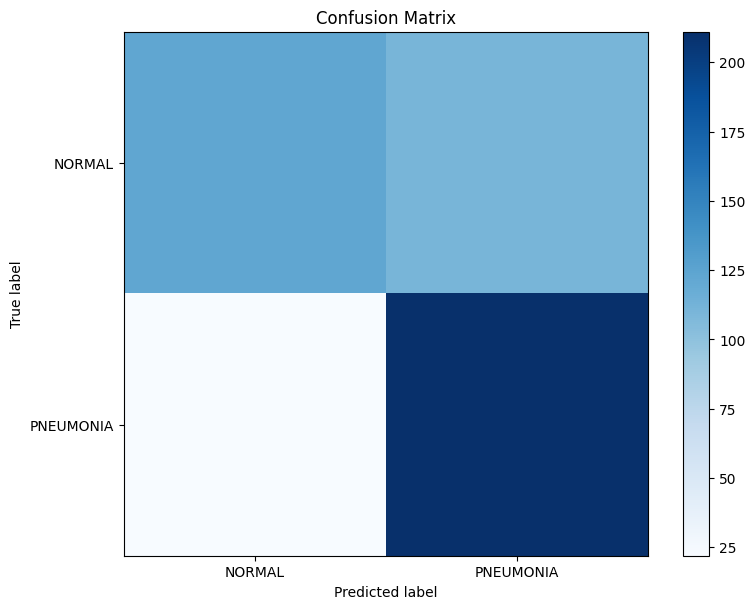

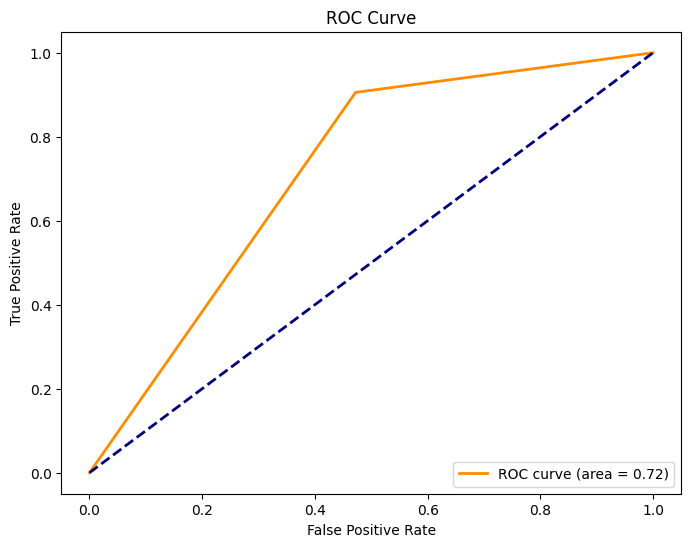

Running KNN with k=7...
Accuracy: 71.46%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.47      0.62       233
           1       0.64      0.96      0.77       233

    accuracy                           0.71       466
   macro avg       0.78      0.71      0.70       466
weighted avg       0.78      0.71      0.70       466



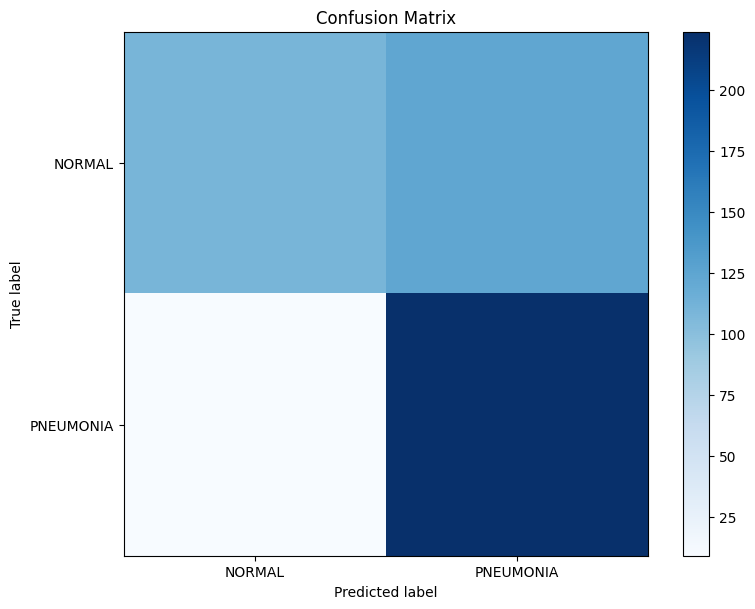

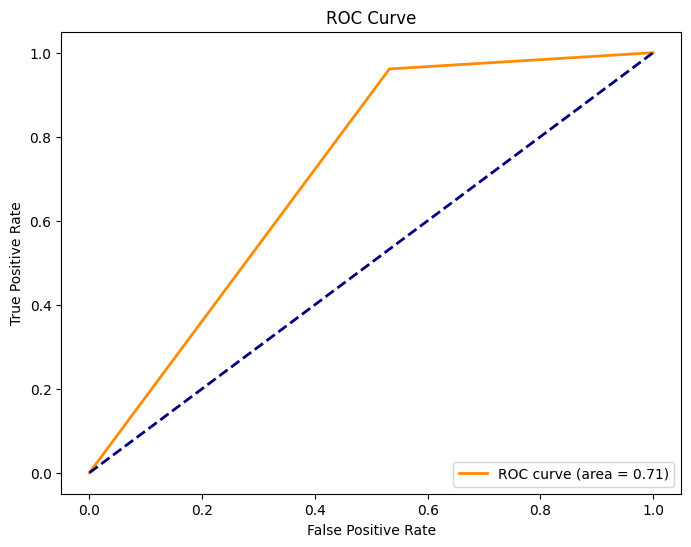

Running KNN with k=8...
Accuracy: 71.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.49      0.64       233
           1       0.65      0.95      0.77       233

    accuracy                           0.72       466
   macro avg       0.78      0.72      0.70       466
weighted avg       0.78      0.72      0.70       466



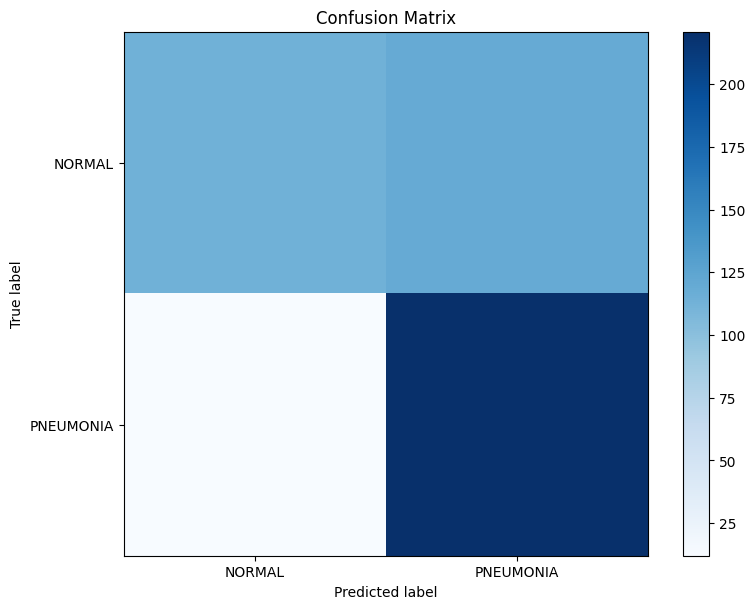

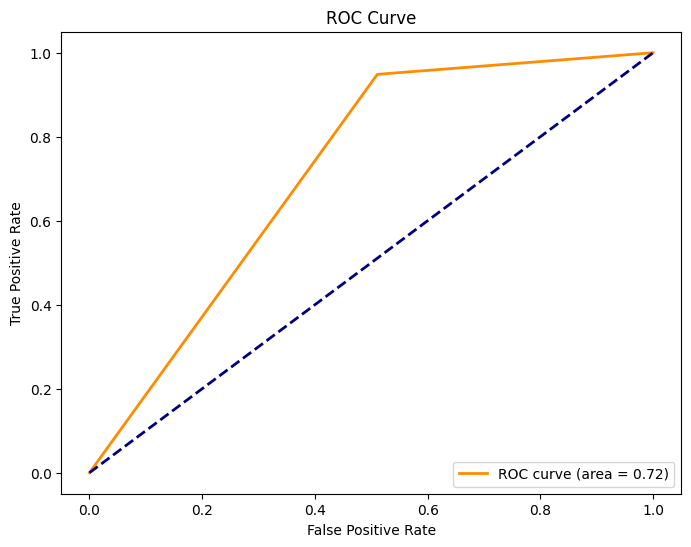

Running KNN with k=9...
Accuracy: 71.03%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.45      0.61       233
           1       0.64      0.97      0.77       233

    accuracy                           0.71       466
   macro avg       0.79      0.71      0.69       466
weighted avg       0.79      0.71      0.69       466



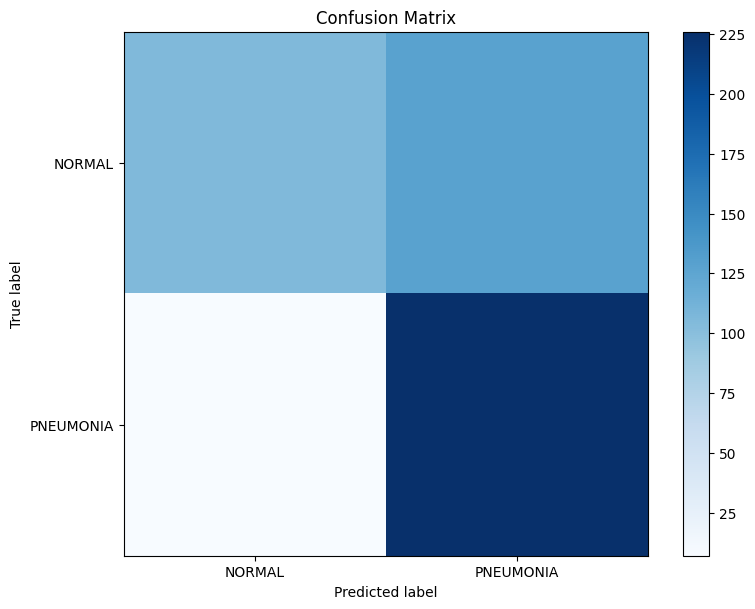

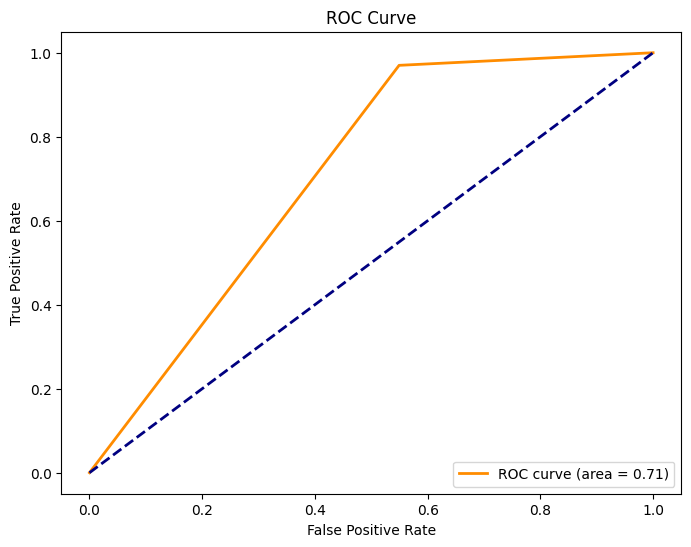

Running KNN with k=10...
Accuracy: 72.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.49      0.64       233
           1       0.65      0.95      0.77       233

    accuracy                           0.72       466
   macro avg       0.78      0.72      0.71       466
weighted avg       0.78      0.72      0.71       466



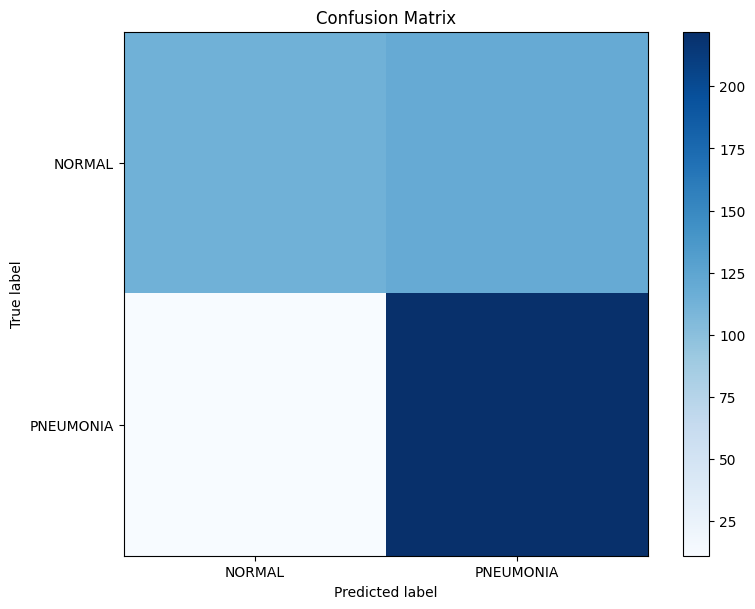

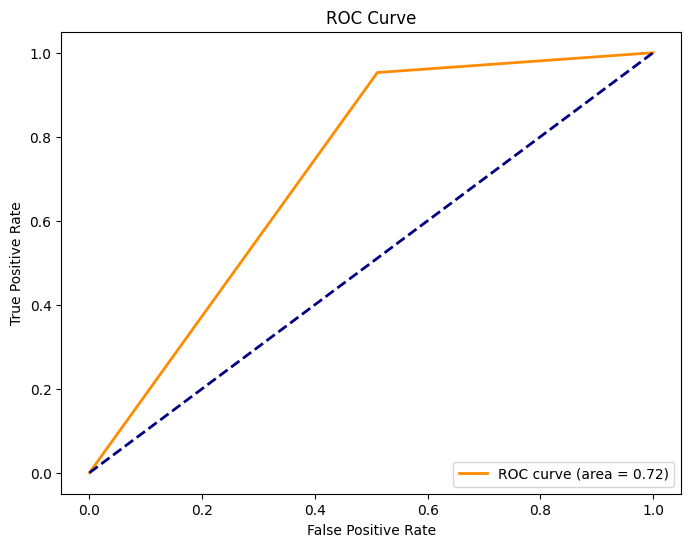

In [43]:
def evaluate_model(model, X, Y):
    predictions = model.predict(X)
    accuracy = accuracy_score(Y, predictions)
    roc_auc = roc_auc_score(Y, predictions)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Classification Report:\n{classification_report(Y, predictions, zero_division=0)}')

    # confusion matrix
    cm = confusion_matrix(Y, predictions)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['NORMAL', 'PNEUMONIA'])
    plt.yticks(tick_marks, ['NORMAL', 'PNEUMONIA'])
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(Y, predictions)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy

accuracies = []
k_values = range(1, 11) # as there is 2 classes (NORMAL and PNEUMONIA), pair k will yield better results

for k in k_values:
    print(f'Running KNN with k={k}...')
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    accuracies.append(evaluate_model(knn, X_test, Y_test))

# Plot the evolution of the accuracy per k

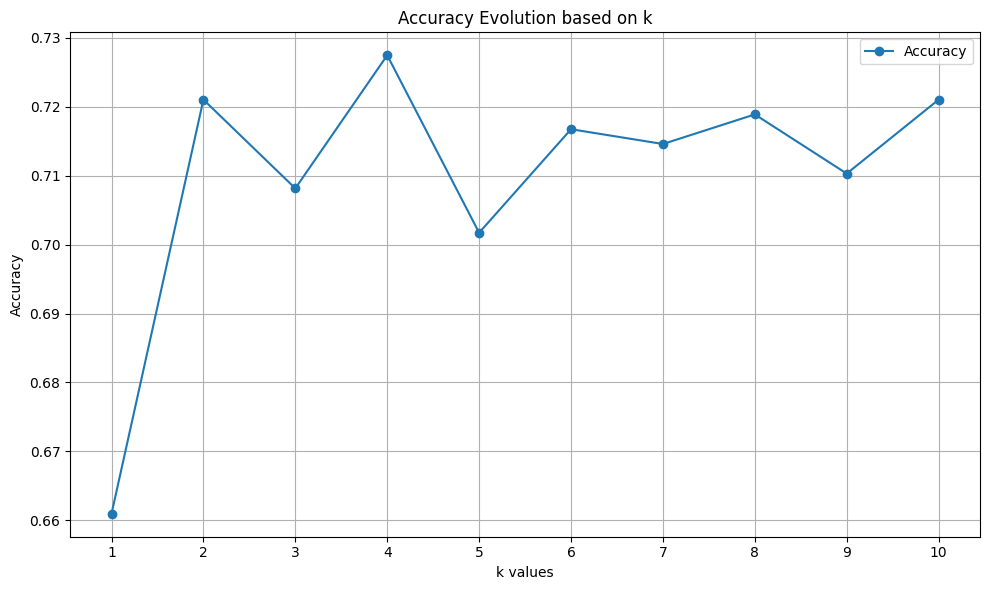

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', label='Accuracy')
plt.title('Accuracy Evolution based on k')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()